In [9]:
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', color_codes=True)
sns.set_context(rc={"font.family":"sans","font.size":24,"axes.titlesize":24,"axes.labelsize":24})

# model building package
import sklearn

import warnings
warnings.filterwarnings("ignore")


In [10]:
df = pd.read_csv('lemmatized_wHM_full.csv')

In [11]:
df = df[df['lemmatized'].notna()]

In [12]:
df['lemmatized'] = df['lemmatized'].str.lower()

In [13]:
tweets = df[df['lemmatized'].str.contains('moschino')]
tweets['lemmatized'] = tweets['lemmatized'].apply(lambda x : x.replace('moschino', ''))
tweets.head()

,Unnamed: 0,id,time,created_at,from_user_name,text,filter_level,possibly_sensitive,withheld_copyright,withheld_scope,...,from_user_friendcount,from_user_favourites_count,from_user_listed,from_user_withheld_scope,from_user_created_at,mentions,hashtags,is_retweet,clean_text,lemmatized
2418,2418,1225412956034404353,1580996190,2020-02-06 13:36:30,studionailz79,A little payday treat for myself! Why not I wo...,none,0.0,NaN,NaN,...,4592,4427,43,NaN,2011-05-04 13:55:10,NaN,lovemoschino; bag; crossbodybag; blackandgold;...,False,A little payday treat for myself! Why not I wo...,little payday treat why not work hard fair bar...
4127,4127,1225439414144446464,1581002498,2020-02-06 15:21:38,DanielXIronside,#ebay #ebayseller #amazon #ebayreseller #Desig...,none,0.0,NaN,NaN,...,505,5713,23,NaN,2009-04-10 17:11:15,NaN,ebay; ebayseller; amazon; ebayreseller; Design...,False,ebay ebayseller amazon ebayreseller Designer e...,ebay ebayseller amazon ebayreseller designer e...
4372,4372,1225443139747446784,1581003386,2020-02-06 15:36:26,sterlingstars_p,RT @JennieGirlsClos: These two are just in the...,none,NaN,NaN,NaN,...,738,443,1,NaN,2018-02-03 02:22:31,JennieGirlsClos; Moschino; poshmark,vintage; fashion; fashionista; style; jenniegi...,True,These two are just in these matching vintage m...,just match vintage jacket poshmark posh n’ si...
4696,4696,1225447942535835648,1581004531,2020-02-06 15:55:31,Jewelry_Greece,RT @DanielXIronside: #ebay #ebayseller #amazon...,none,0.0,NaN,NaN,...,15200,18489,508,NaN,2015-10-20 14:42:40,DanielXIronside,ebay; ebayseller; amazon; ebayreseller; Design...,True,ebay ebayseller amazon ebayreseller Designer e...,ebay ebayseller amazon ebayreseller designer e...
13423,13423,1225600100669456384,1581040809,2020-02-07 02:00:09,FashionablySC,Boutique Moschino Metallic Cut Out Dress https...,none,0.0,NaN,NaN,...,886,107,40,NaN,2011-10-31 00:21:35,NaN,fashion,False,Boutique Moschino Metallic Cut Out Dress fashion,boutique metallic cut dress fashion


# We can now proceed with the proper LDA 

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=10, lowercase=True)

# apply transformation
tf = vectorizer.fit_transform(tweets['lemmatized']) #.toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

tf_feature_names[:-1]

['02',
 '20',
 'abrams',
 'angelicfashionhouse',
 'antoinette',
 'antonieta',
 'apparently',
 'appreciate',
 'autumn',
 'aw20',
 'backstage',
 'bag',
 'balenciaga',
 'bastidor',
 'bella',
 'bellahadid',
 'biker',
 'boutique',
 'bride',
 'btscomeback2020',
 'cake',
 'chanel',
 'channel',
 'chic',
 'click',
 'close',
 'clothes',
 'colección',
 'collection',
 'cut',
 'day',
 'denim',
 'desfilar',
 'desfile',
 'designer',
 'digital',
 'dior',
 'do',
 'dolcegabbana',
 'dress',
 'eat',
 'elite',
 'entrance',
 'exclusively',
 'fall',
 'fallwinter2020',
 'fashion',
 'fashionblogger',
 'fashionista',
 'fashionshow',
 'fashionweek',
 'february',
 'felizviernesatodos',
 'fendi',
 'fevereiro',
 'fid',
 'filmar',
 'final',
 'finale',
 'follow',
 'foto',
 'fotografar',
 'fotografare',
 'fw',
 'fw20',
 'genius',
 'gerber',
 'get',
 'gettyimage',
 'gigi',
 'gigihadid',
 'gracias',
 'gucci',
 'hadid',
 'handbag',
 'happy',
 'here',
 'highlight',
 'hoje',
 'hoodie',
 'how',
 'hunter',
 'icing',
 'instag

In [15]:
# Helper function to plot the most common words 
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

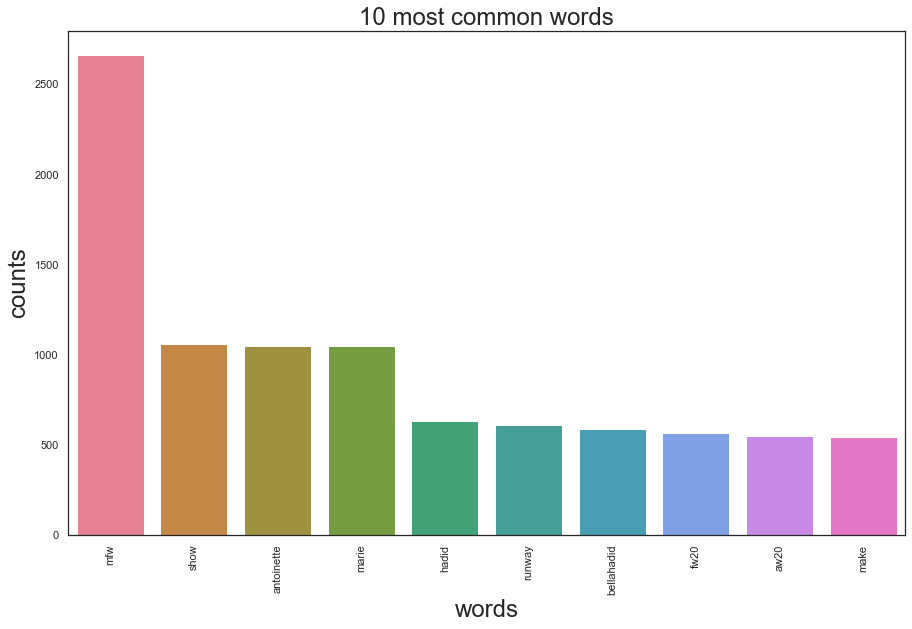

In [16]:
plot_10_most_common_words(tf,vectorizer)

## Fit LDA model
We start by trying with a model with 5 topics.
- `n_components`: number of topics = 3
- `learning_decay`: which controls the learning rate = 0.9.

In [17]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 4
learning_decay = 0.9
random_state = 1234

model = LatentDirichletAllocation(n_components=number_of_topics,n_jobs = -1, evaluate_every = -1, 
                                  random_state=random_state, learning_decay=learning_decay) # random state for reproducibility

In [18]:
lda_output = model.fit_transform(tf)

### Diagnose model performance with perplexity and log-likelihood

A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good.

In [19]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", model.score(tf))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", model.perplexity(tf))

# See model parameters
print(model.get_params())

Log Likelihood:  -91040.17638457927
Perplexity:  46.626462155422864
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.9, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 4, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 1234, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [20]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words, array):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        array.append([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])

In [21]:
print("Topics found via LDA:")
number_of_words = 20
array = []
print_topics(model, vectorizer, number_of_words, array)

Topics found via LDA:

Topic #0:
mfw fashion fall show milanfashionweek icing bride collection obsessed milan new luxury winter shop versace saweetie style styling elite fendi

Topic #1:
mfw cake let wear versaille streetwear winter kaiagerber eat collection autumn fall milanfashionweek ready fallwinter2020 prada gucci moncler genius การร

Topic #2:
mfw show runway bellahadid aw20 make entrance supermodel fw20 mfy gigi hadid milano sfilare gigihadid walk itsjeremyscott do romee strijd

Topic #3:
marie antoinette mfw hadid gigi fw20 denim hoodie biker backstage sfilata mfw2020 mfy jeremy bella milano scott milão itália 02


In [54]:
from pyLDAvis import gensim as ldavis_gensim
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os 

LDAvis_prepared = sklearn_lda.prepare(model, tf, vectorizer)

pyLDAvis.display(LDAvis_prepared)

We can save the model so not to have to generate it again

In [22]:
df = pd.DataFrame(columns=['topic','word'])

In [23]:
for i in range(len(array)):
    for j in range(len(array[i])):
        df = df.append({'topic' : i+1, 'word' : array[i][j]}, ignore_index=True)

In [24]:
df.to_csv('topic_word_moschino.csv')